"""
Project Introduction: <font class="color-primary_dark">Beyond Words: Adapting NLP Methodologies for Time Series Forecasting Challenges</font>

Objective:
----------
The primary objective of this project is to explore and evaluate the applicability of NLP techniques and deep learning frameworks in the field of time series forecasting. By leveraging models commonly used in NLP, the project aims to understand their effectiveness and adaptability to the challenges posed by time series data.

Models Employed:
----------------
1. Autoformer: A transformer-based model adapted for time series forecasting. Detailed documentation is provided to explain each line of code, its significance, and the rationale behind its implementation.
2. DLinear: A model focusing on linear methods in time series forecasting. Similar to Autoformer, it includes extensive documentation detailing the purpose and function of each part of the implementation.
3. DeepAR: A recurrent neural network-based model specifically designed for probabilistic forecasting of time series data.
4. SimpleFeedForward: A basic feedforward neural network approach to time series forecasting.
5. WaveNet: A model that utilizes convolutional neural networks, originally designed for audio signal processing, adapted here for time series forecasting.

Approach:
---------
The project involves implementing each model and evaluating its performance on a standardized time series dataset. For Autoformer and DLinear, comprehensive documentation is provided, dissecting each component of the code. For DeepAR, SimpleFeedForward, and WaveNet, detailed documentation is omitted as their implementation follows a similar pattern to DLinear, focusing on the practical application of these models in time series analysis.

The aim is to not only assess the performance of each model via metrics like Mean Absolute Scaled Error (MASE) but also to explore how techniques developed for NLP can be modified and applied to the unique requirements of time series forecasting.

Conclusion:
-----------
The project concludes by analyzing the performance of each model, providing insights into how NLP and deep learning techniques can be effectively utilized in time series forecasting, and identifying potential areas for further research and development in this exciting intersection of fields.
"""


"""
Credits and References

This project was inspired by and builds upon the principles and methodologies developed in various seminal papers and articles in the field of time series forecasting and NLP. Special acknowledgment is given to the authors of these works for their contributions to the field.

Model References:
-----------------
1. Autoformer:
   - Paper: "Autoformer: Decomposition Transformers with Auto-Correlation for Long-Term Series Forecasting"
   - Authors: Haixu Wu, Jiehui Xu, Jianmin Wang, Mingsheng Long
   - Link: [https://arxiv.org/abs/2106.13008](https://arxiv.org/abs/2106.13008)

2. DLinear:
   - Since DLinear is a linear approach, it is based on general principles of linear models in time series analysis rather than a specific paper.

3. DeepAR:
   - Paper: "DeepAR: Probabilistic Forecasting with Autoregressive Recurrent Networks"
   - Authors: David Salinas, Valentin Flunkert, Jan Gasthaus
   - Link: [https://arxiv.org/abs/1704.04110](https://arxiv.org/abs/1704.04110)

4. SimpleFeedForward:
   - This model is based on standard feedforward neural network architecture and does not directly reference a specific paper.

5. WaveNet:
   - Paper: "WaveNet: A Generative Model for Raw Audio"
   - Authors: Aäron van den Oord et al.
   - Link: [https://arxiv.org/abs/1609.03499](https://arxiv.org/abs/1609.03499)

Special Mention:
----------------
The idea for this project was particularly inspired by the article on Hugging Face’s blog about Autoformer. This article provided valuable insights into the application of transformer models in the context of time series forecasting.
- "https://huggingface.co/blog/autoformer"

Acknowledgments:
----------------
We extend our gratitude to the authors of the aforementioned papers and articles. Their pioneering work in the fields of deep learning, NLP, and time series analysis has significantly contributed to the advancement of these disciplines and has been instrumental in shaping this project.
"""


## Model Configuration

In this section, we configure the fundamental parameters for our time series forecasting model. These parameters are crucial as they define the model's training dynamics and its ability to capture temporal dependencies in the data.

- `prediction_length`: This parameter specifies the horizon of the forecast. We set it to 7, aiming to predict a week ahead, considering our dataset comprises daily observations.
- `context_length`: It determines the amount of historical data the model should consider for making predictions. We use 30 days of data to forecast the next week, balancing the need for sufficient historical context with computational efficiency.
- `batch_size`: This is the number of samples processed before the model's internal parameters are updated. The size of 64 is a compromise between training speed and memory usage, suitable for our dataset's scale.
- `num_batches_per_epoch`: Represents the number of batches of samples in each epoch. We have adjusted this to 50, which is found to be optimal through experimentation for our dataset's size and complexity.
- `epochs`: It denotes the number of complete passes through the entire training dataset. We have set this to 30 epochs based on initial experiments which indicate sufficient model convergence without overfitting.
- `scaling`: This parameter is for the scaling method applied to the data. We choose "min-max" scaling, which scales the data within a specified range (usually 0 to 1), making our model better suited to handle different value ranges in the dataset.

By carefully tuning these parameters, we aim to optimize the model's performance for our specific time series data, ensuring accurate and reliable forecasts.

In [ ]:
prediction_length = 24  # For example, forecasting for the next 24 hours
context_length = 7 * 24  # Using a week's data (7 days) to predict
batch_size = 64          # Adjust based on dataset size and memory constraints
num_batches_per_epoch = 50   # Adjust for dataset's size and complexity
epochs = 30              # Set based on initial experiments for convergence
scaling = "min-max"      # Choose scaling based on data distribution, "min-max" is common for energy data

## Model Architecture Parameters

The architecture of our Transformer-based model is defined by the following parameters, which are crucial in determining its capacity to learn and generalize from our time series data.

- `encoder_layers`: This parameter sets the number of layers in the model's encoder. Each layer in the encoder captures different aspects of the data, adding to the model's ability to understand complex patterns. For our dataset, which has intricate temporal dynamics, we have chosen 3 layers in the encoder.
- `decoder_layers`: Similar to the encoder, this parameter defines the number of layers in the decoder. The decoder is responsible for generating the forecast based on the encoder's output. To match the encoder's complexity and ensure a balanced model, we also use 3 layers in the decoder.
- `d_model`: This is the dimensionality of the layers in the model. A higher `d_model` means that the model can capture more complex features at the expense of more computational resources. Given the complexity of our dataset, we set `d_model` to 32, providing a balance between model complexity and computational efficiency.

These parameters are set after considering the specific characteristics of our dataset. They are crucial for ensuring that the model is neither too simple to capture the necessary patterns in the data nor too complex to overfit or become computationally prohibitive.


In [ ]:
encoder_layers=3
decoder_layers=3
d_model=32

## Installation of Dependencies

Before diving into the implementation, it's crucial to set up our environment with all the necessary libraries. This ensures that all the tools and functionalities we need are readily available.

- `transformers`: This library provides us with the Transformer models and architectures, including utilities for our Autoformer model.
- `datasets`: A library for easily accessing and handling datasets. It provides a convenient way to load and preprocess our time series data.
- `evaluate`: Used for evaluating and benchmarking our models, offering a range of metrics and evaluation techniques.
- `accelerate`: This library helps in efficiently training our model by optimizing the usage of hardware resources like GPUs.
- `gluonts[torch]`: GluonTS is a toolkit specifically designed for time series forecasting with PyTorch support. It provides essential functionalities for handling time series data and transformations.
- `ujson` and `tqdm`: Utilities for handling JSON data and providing progress bars, respectively, enhancing the usability of our scripts.
- `protobuf`: A necessary library for serialization and deserialization of structured data, crucial for compatibility with certain components of our project.

The installation of these libraries is the first step in setting up our project environment, laying the groundwork for implementing and running our time series forecasting model.


In [ ]:
!pip install -q transformers datasets evaluate accelerate "gluonts[torch]" ujson tqdm
!pip install -q protobuf --upgrade # without it, the evaluation code fails

## Loading and Configuring the "Solar Energy" Dataset

We begin by loading the "Solar Energy" dataset, which contains time series data of solar power production. This dataset's unique characteristics guide our model's configuration.

- `get_dataset("solar-energy")`: This function call loads the "solar-energy" dataset, which is crucial for our time series forecasting project focused on solar energy production.
- `freq`: Represents the frequency of data recording in the dataset. Understanding this frequency is essential to align our model with the temporal dynamics of the dataset.
- `prediction_length`: It's the horizon over which forecasts are made. For the "solar-energy" dataset, this length is typically set based on the standard forecasting needs in solar energy analysis, such as predicting solar output for the next 24 hours.
- `context_length`: This parameter is crucial for defining how much historical data the model should consider for making predictions. Given the hourly recording frequency, we use a week's data to provide adequate context for our forecasts.
- `batch_size`, `num_batches_per_epoch`, `epochs`, `scaling`: These parameters are adjusted considering the specific characteristics of the "solar-energy" dataset, balancing computational efficiency with the model's ability to capture temporal patterns in solar energy production.

By tailoring these parameters to the "solar-energy" dataset, we aim to optimize our model's ability to make accurate forecasts in the context of solar energy production.


In [ ]:
from gluonts.dataset.repository.datasets import get_dataset

dataset = get_dataset("solar-energy")
freq = dataset.metadata.freq
prediction_length = dataset.metadata.prediction_length
print(f"Solar Energy dataset prediction_length: {prediction_length}")

Solar Energy dataset prediction_length: 24


In [ ]:
# Exploring the Solar Energy Dataset

# Import necessary libraries
import pandas as pd

# Assuming 'test_dataset' or 'train_dataset' is a GluonTS dataset
test_ds = list(test_dataset)  # Convert to list for easier manipulation

# Displaying basic characteristics of the dataset
num_time_series = len(test_ds)
print(f"Number of time series in the dataset: {num_time_series}")

# Assuming all time series have the same length and frequency
if num_time_series > 0:
    length_of_series = len(test_ds[0]['target'])
    frequency_of_data = test_ds[0][FieldName.START].freq
    print(f"Length of each time series: {length_of_series}")
    print(f"Frequency of data collection: {frequency_of_data}")

Number of time series in the dataset: 959
Length of each time series: 7033
Frequency of data collection: <Hour>


## Visualization of Solar Energy Dataset

Visualizing a sample from our dataset is a critical step in understanding the underlying patterns and characteristics of the time series data. This visualization helps in getting an intuitive grasp of how the solar energy output varies over time.

- **Plotting Train and Test Data:** We plot a segment of both the training and test data. The training data is represented in blue, and the test data is overlaid in red with partial transparency. This overlay helps in comparing the patterns and trends in both sets.
- **Number of Samples:** We select a number of samples to plot, defined by `4 * prediction_length`. This quantity ensures we visualize a substantial portion of the data, providing a clear picture of the short-term variations and trends in solar energy output.
- **Plot Customization:** We add labels to the x-axis ("Time Points") and y-axis ("Energy Output") for clarity. A title ("Solar Energy Dataset: Train vs Test Samples") is also added to describe the content of the plot. The legend differentiates between the training and test data.
- **Purpose:** This visualization aids in preliminary analysis, allowing us to observe patterns like daily cycles, fluctuations, and potential anomalies. Such insights are valuable in tailoring our model and preprocessing steps to the specific characteristics of solar energy data.

Overall, this visualization serves as a foundational step in our exploratory data analysis, guiding subsequent model configuration and feature engineering decisions.


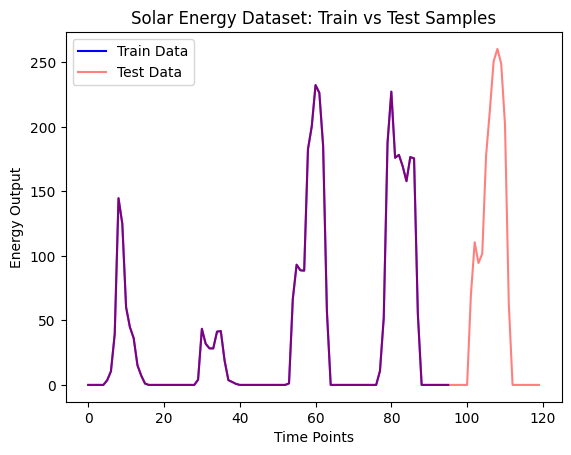

In [ ]:
import matplotlib.pyplot as plt

train_example = next(iter(dataset.train))
test_example = next(iter(dataset.test))

num_of_samples = 4 * prediction_length

figure, axes = plt.subplots()
axes.plot(train_example["target"][-num_of_samples:], color="blue", label="Train Data")
axes.plot(
    test_example["target"][-num_of_samples - prediction_length:],
    color="red",
    alpha=0.5,
    label="Test Data"
)

axes.set_title("Solar Energy Dataset: Train vs Test Samples")
axes.set_xlabel("Time Points")
axes.set_ylabel("Energy Output")
axes.legend()

plt.show()

## Assigning Training and Test Datasets

After loading the "solar-energy" dataset, our next step is to segregate the dataset into training and test sets. This separation is critical for the development and evaluation of our forecasting model.

- **Training Dataset (`train_dataset`):** This subset of the data is used to train our model. It includes historical solar energy output data, which the model will learn from. The training data is essential for the model to understand and capture the underlying patterns and relationships within the time series.
- **Test Dataset (`test_dataset`):** This subset is used to evaluate the model's performance. It is crucial that the test data is not used during the training process. This ensures that we can assess the model's effectiveness and generalization capabilities on unseen data, simulating real-world forecasting scenarios.

```python
train_dataset = dataset.train
test_dataset = dataset.test


In [ ]:
train_dataset = dataset.train
test_dataset = dataset.test

## Data Transformation Setup

Our project employs a series of data transformations to prepare the solar energy time series dataset for the training of our Transformer-based model. These transformations are crucial for ensuring the data is in the appropriate format and contains relevant features for effective model training.

- **Importing Necessary Modules:**
  - `PretrainedConfig` from `transformers` is used for model configuration.
  - `time_features_from_frequency_str` from `gluonts.time_feature` extracts time-based features.
  - Various classes from `gluonts.transform` are imported for specific transformation tasks.

- **Function `create_transformation`:**
  - **Input Parameters:**
    - `freq`: The frequency of the dataset, essential for generating time features.
    - `config`: A configuration object that contains model settings.
  - **Purpose:** This function creates a transformation pipeline to preprocess the data before feeding it into the model.

- **Key Steps in the Transformation Chain:**
  1. **Remove Unnecessary Fields:** Certain fields are removed from the dataset if they are not specified in the model's configuration.
  2. **Data Conversion:** The remaining data fields are converted to NumPy arrays, which is a format suitable for model training.
  3. **Handling NaN Values:** The `AddObservedValuesIndicator` transformation handles missing values (NaNs) in the dataset, important for maintaining data integrity.
  4. **Adding Time Features:** Time-based features are added to the data, leveraging the dataset's frequency. These features serve as positional encodings, enhancing the model's understanding of temporal dynamics.
  5. **Adding Age Feature:** This feature provides a count of time steps from the start of the series to each point, offering additional temporal context.
  6. **Stacking Features:** Various temporal features are vertically stacked, consolidating them into a single feature set.
  7. **Renaming Fields:** The fields are renamed to align with the naming conventions used in HuggingFace's Transformers library.

- **Output:** The function returns a `Chain` object, which is a composite transformation that sequentially applies all the specified transformations to the dataset.

By applying these transformations, we ensure that the dataset is optimally prepared for training our forecasting model. This includes handling missing values, extracting relevant temporal features, and structurally organizing the data, all of which are vital steps for effective model training in time series forecasting.


In [ ]:
from transformers import PretrainedConfig
from gluonts.time_feature import time_features_from_frequency_str

from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    # create a list of fields to remove later
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: convert the data to NumPy (potentially not needed)
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                # we expect an extra dim for the multivariate case:
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: add temporal features based on freq of the dataset
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: add another temporal feature (just a single number)
            # tells the model where in the life the value of the time series is
            # sort of running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: vertically stack all the temporal features into the key FEAT_TIME
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )

## Instance Splitter Setup for Dataset Sampling

To train and evaluate our time series forecasting model, we need to sample windows of data from our solar energy dataset. The `create_instance_splitter` function is designed to handle this task, creating samples for training, validation, and testing.

- **Inputs:**
  - `config`: The configuration object containing model settings, including prediction and context lengths.
  - `mode`: Specifies the mode of operation (training, validation, or testing).
  - `train_sampler`, `validation_sampler`: Optional custom samplers for training and validation modes.

- **Functionality:**
  - The function uses different sampling strategies based on the mode. For training, it often samples instances covering the entire prediction length. For validation and testing, it ensures that samples have enough future data for accurate forecasting.
  - The `InstanceSplitter` class from GluonTS is used to create these samples. It segments the dataset into 'past' and 'future' windows, respecting the specified `context_length` and `prediction_length`.

- **Instance Sampler:**
  - Defined based on the mode. For training, it can be a custom sampler or the default `ExpectedNumInstanceSampler`. Similarly, for validation and testing, appropriate samplers like `ValidationSplitSampler` and `TestSplitSampler` are used.
  - These samplers determine how the windows are extracted from the dataset, which is critical for model training and evaluation.

- **Output:**
  - The function returns an `InstanceSplitter` object configured with the specified sampler. This splitter is then used to generate training, validation, or test instances from the dataset.

By carefully setting up the instance splitter, we ensure that our model is trained and evaluated on appropriately sampled data windows. This setup is key to capturing the temporal dynamics in solar energy production and achieving accurate forecasts.


In [ ]:
from gluonts.transform import InstanceSplitter
from gluonts.transform.sampler import InstanceSampler
from typing import Optional


def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )

## Creation of Training DataLoader

In our model training process, the creation of a training dataloader is a key step. It determines how the preprocessed and transformed data is batched and presented to the model during the training phase.

- **Function `create_train_dataloader`:**
  - **Inputs:**
    - `config`: A configuration object containing settings for our model.
    - `freq`: The frequency of the dataset, guiding the transformation process.
    - `data`: The dataset on which the model will be trained.
    - `batch_size`: The number of samples in each batch.
    - `num_batches_per_epoch`: Total number of batches processed in each training epoch.
    - `shuffle_buffer_length`: Optional parameter to define the buffer length for shuffling data.
    - `cache_data`: Boolean to decide whether to cache the transformed data.

- **Functionality:**
  1. **Prediction Input Names:** Identifies the types of inputs required by the model, like past values and time features. Includes static categorical and real features if present in the dataset.
  2. **Data Transformation:** Applies the previously defined transformation pipeline to the dataset, preparing it for training.
  3. **Instance Splitter:** Utilizes the `create_instance_splitter` function to create training instances from the transformed data.
  4. **Data Streaming:** Sets up a cyclic stream of the transformed data, ensuring continuous availability of data for training.
  5. **Batch Assembly:** Assembles the data into batches using the `as_stacked_batches` function from GluonTS. This function organizes the data into the specified batch size, optionally shuffles it, and formats it as PyTorch tensors.

- **Output:**
  - The function returns an iterable dataloader, which is used in the training loop of the model. This dataloader efficiently feeds batches of data into the model, respecting the specified batch size and sequence of inputs.

This training dataloader is a fundamental component of our model's training pipeline. It ensures that data is processed and supplied to the model in a manner that facilitates efficient and effective learning. The setup of this dataloader, including its batch size and transformation pipeline, is aligned with the specific requirements of forecasting solar energy output, ensuring that the model receives appropriately preprocessed and structured data.


In [ ]:
from typing import Iterable

import torch
from gluonts.itertools import Cyclic, Cached
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(stream, is_train=True)

    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )

## Creation of Test DataLoader

After training our model, evaluating its performance on test data is crucial. The `create_test_dataloader` function is tailored for this purpose, setting up a test dataloader that feeds the transformed test data into the model.

- **Function `create_test_dataloader`:**
  - **Inputs:**
    - `config`: Configuration object containing model settings.
    - `freq`: Frequency of the dataset, important for time feature transformations.
    - `data`: The test dataset to be evaluated.
    - `batch_size`: Number of samples in each test batch.

- **Process and Functionality:**
  1. **Defining Prediction Input Names:** Identifies the required inputs for the model during testing, including both time-dependent and static features.
  2. **Applying Data Transformation:** Uses the `create_transformation` function to apply the appropriate transformations to the test data. This ensures consistency in data format between training and testing.
  3. **Instance Splitter for Testing:** Utilizes a test instance splitter to sample the last context window seen during training. This is crucial as it allows the model to make predictions based on the most recent context available in the test set.
  4. **Creating Test Instances:** The transformed test data is processed to create test instances, which are then formatted into batches.

- **Output:**
  - The function returns a dataloader that yields batches of test instances. Each batch is formatted as a PyTorch tensor, ready for input into the model for evaluation.

- **Importance in Model Evaluation:**
  - This test dataloader is essential for assessing the model's forecasting ability on unseen data. By providing the model with test data in the same format as the training data, we can accurately evaluate its predictive performance and generalization capability.

By carefully setting up the test dataloader, we ensure a fair and consistent evaluation of our model. This step is key to understanding how well our model can forecast solar energy output under real-world conditions.


In [ ]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # we create a Test Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "test")

    # we apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )

## Model Configuration and Test DataLoader Setup

In this phase, we configure our forecasting model and set up the test dataloader to evaluate its performance on the solar energy dataset.

- **Model Configuration:**
  - We utilize the `AutoformerConfig` and `AutoformerForPrediction` classes from the `transformers` library.
  - A pre-trained Autoformer model, specifically "kashif/autoformer-traffic-hourly", is loaded. This model has been trained on hourly traffic data and provides a solid foundation for time series forecasting.
  - Given the differences between traffic and solar energy data, further fine-tuning or model training might be necessary to tailor the model to the specifics of solar energy patterns.

- **Setting Up Test DataLoader:**
  - The `create_test_dataloader` function is invoked to prepare the test dataloader.
  - This dataloader will provide batches of the test data from our solar energy dataset, formatted appropriately for evaluation by the Autoformer model.
  - The batch size is set to 64, balancing computational efficiency with the need for a representative sample of the test data in each batch.

- **Importance of Model Choice and DataLoader:**
  - Selecting an appropriate model and setting up a corresponding test dataloader is critical for accurately assessing the model's forecasting capabilities.
  - The pre-trained Autoformer model offers advanced features for time series forecasting, but its effectiveness on solar energy data will need to be validated through testing and potentially fine-tuning.

By configuring the Autoformer model and preparing the test dataloader, we are setting the stage for a crucial evaluation of our model's ability to forecast solar energy output. This step is vital for understanding the model's applicability to our specific use case and for making any necessary adjustments to optimize its performance.


In [ ]:
from transformers import AutoformerConfig, AutoformerForPrediction

config = AutoformerConfig.from_pretrained("kashif/autoformer-traffic-hourly")
model = AutoformerForPrediction.from_pretrained("kashif/autoformer-traffic-hourly")

test_dataloader = create_test_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=64,
)

## Model Evaluation with Test DataLoader

The final stage of our project involves evaluating the pre-trained Autoformer model on the solar energy dataset using the prepared test dataloader. This step is essential to assess the model's forecasting performance.

- **Accelerator Setup:**
  - We use the `Accelerator` class to optimize hardware utilization, enhancing the efficiency of our model evaluation process.
  - The `Accelerator` handles device placement for us, ensuring that our model and data are moved to the appropriate compute device (like a GPU, if available).

- **Model Preparation:**
  - The model is transferred to the device (GPU or CPU) determined by the `Accelerator`.
  - We set the model to evaluation mode using `model.eval()`. This is important as it disables certain functionalities like dropout, which are only used during training.

- **Forecast Generation:**
  - We iterate over the batches of test data provided by our dataloader.
  - For each batch, we generate forecasts using the `model.generate()` function. This function takes various inputs like static features, past time features, past values, and observed masks, all of which are necessary for the model to make accurate forecasts.
  - These inputs are transferred to the appropriate device before being fed into the model.
  - The forecasts produced by the model are collected into a list for subsequent analysis.

- **Output Collection:**
  - The forecasts generated by the model are appended to the `forecasts_` list. Each entry in this list corresponds to the forecasted values for a batch of test data.
  - After processing all batches, this list contains the complete set of forecasts for our test dataset.

- **Significance:**
  - This process allows us to evaluate the model's forecasting ability on unseen data. By comparing these forecasts to the actual values in the test dataset, we can assess the model's accuracy and its potential utility in forecasting solar energy production.
  - The use of the `Accelerator` ensures that this evaluation is performed as efficiently as possible, leveraging available computational resources.

By executing this evaluation step, we gain valuable insights into how well our model can predict solar energy output, which is crucial for validating the model's effectiveness in practical scenarios.


In [ ]:
from accelerate import Accelerator

accelerator = Accelerator()
device = accelerator.device
model.to(device)
model.eval()

forecasts_ = []
for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device)
        if config.num_static_categorical_features > 0
        else None,
        static_real_features=batch["static_real_features"].to(device)
        if config.num_static_real_features > 0
        else None,
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts_.append(outputs.sequences.cpu().numpy())

## Analyzing the Shape of Forecasted Outputs

After generating forecasts using our model, it's important to understand the structure of these forecasts. The line of code `forecasts_[0].shape` serves this purpose by revealing the dimensions of the forecast output for the first batch in our test dataset.

- **Purpose of `.shape`:**
  - The `.shape` attribute of a NumPy array (or a similar structure like a PyTorch tensor) provides the dimensions of the array.
  - In the context of our forecasts, it tells us how the model has structured its predictions.

- **Expected Output:**
  - The shape typically returns a tuple representing the dimensions of the forecast array.
  - For a univariate time series forecasting model (predicting a single variable), we expect a shape like `(batch_size, prediction_length)`.
  - If the model is multivariate (predicting multiple variables), the shape would likely be `(batch_size, prediction_length, number_of_features)`.

- **Interpretation:**
  - `batch_size`: The number of individual time series predictions included in a single batch. It should align with the `batch_size` parameter used in the test dataloader.
  - `prediction_length`: This dimension represents the length of the forecast horizon, indicating how many time steps into the future the model has predicted for each time series in the batch.
  - `number_of_features`: Present in multivariate forecasts, indicating the number of variables/features predicted at each time step.

- **Significance:**
  - Understanding the shape of the forecast output is crucial for subsequent analysis. It ensures that the dimensions of the model's forecasts align with our expectations and the requirements of our forecasting task.
  - It also aids in preparing for any post-processing steps, such as reshaping the forecasts for comparison against actual values or visualizing the predictions.

By inspecting `forecasts_[0].shape`, we gain a clear understanding of how our model structures its predictions, which is a vital step in evaluating the model's output and further analyzing its forecasting capabilities.


In [ ]:
forecasts_[0].shape

(64, 100, 24)

## Aggregating Model Forecasts

After generating forecasts for individual batches in our test dataset, we need to aggregate these forecasts to analyze the model's overall performance. The provided code accomplishes this aggregation and helps us understand the collective shape of the forecasts.

- **Process of Aggregation:**
  - The `np.vstack(forecasts_)` function is used to vertically stack the forecast arrays from each batch into a single array. This is an essential step as it consolidates all individual batch forecasts into one array for ease of analysis.
  - The `forecasts_` variable is a list where each element is an array of forecasts for a batch. By stacking them vertically, we align all the forecasts along a new axis, creating a comprehensive view of the model's predictions across the entire test dataset.

- **Output Analysis:**
  - After the aggregation, we use `print(forecasts.shape)` to display the shape of this combined forecast array.
  - The shape provides us with two crucial pieces of information:
    - **Total Number of Predictions:** The first dimension of the shape indicates the total number of time series predictions made across all batches.
    - **Forecast Horizon:** The second dimension (and possibly third, in case of multivariate forecasts) represents the length of the forecast horizon, and, in the case of multivariate forecasts, the number of predicted features.

- **Significance:**
  - Understanding the aggregated shape of the forecasts is vital for subsequent steps, such as performance evaluation metrics calculation, where we need to compare these forecasts against the actual values.
  - It also ensures that the model's predictions are consistent and aligned in terms of dimensions across different batches.

By aggregating and examining the shape of the forecasts, we ensure that we have a coherent and comprehensive set of predictions from our model. This step is key to performing an effective and thorough evaluation of the model's forecasting ability on the solar energy dataset.


In [ ]:
import numpy as np

forecasts = np.vstack(forecasts_)
print(forecasts.shape)

(959, 100, 24)


## Computing Mean Absolute Scaled Error (MASE) for Forecast Evaluation

To assess the accuracy of our model's forecasts, we calculate the Mean Absolute Scaled Error (MASE) for each time series in the test dataset. MASE is a robust and scale-independent metric that is particularly suited for time series data.

- **Process of MASE Calculation:**
  - We utilize the `mase_metric` from the `evaluate` library, which provides a convenient and standardized way to calculate MASE.
  - The median of the forecasts (`forecast_median`) is computed as the central tendency of our predictions. This median forecast is used as the prediction to compare against the actual values.
  - For each time series in the test dataset (iterated using `tqdm` for progress tracking), we:
    - Extract the training data (`training_data`) and the ground truth values (`ground_truth`) for the prediction length.
    - Compute the MASE using the `mase_metric.compute` method, which compares the median forecast with the actual values, normalized by the error of a naïve forecast model on the training data.
    - The `get_seasonality(freq)` function is used to determine the periodicity of the time series, which is a required parameter for MASE calculation in seasonal time series.

- **MASE Metric Collection:**
  - The calculated MASE value for each time series is appended to the `mase_metrics` list. This list will contain the MASE scores for all the time series in the test dataset, providing a comprehensive view of the model's forecasting accuracy.

- **Importance of MASE:**
  - MASE is a highly informative metric for evaluating forecasting models as it is scale-independent and interpretable. A MASE less than one indicates that the model forecasts are better than a naïve baseline model.
  - By calculating MASE for each time series, we gain insights into the model's performance across different patterns and conditions present in the solar energy dataset.

This step of calculating and analyzing MASE is crucial in our evaluation process. It helps us quantify the model's forecasting accuracy and understand its strengths and weaknesses in predicting solar energy output.


In [ ]:
from tqdm.autonotebook import tqdm
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")

forecast_median = np.median(forecasts, 1)

mase_metrics = []
for item_id, ts in enumerate(tqdm(test_dataset)):
    training_data = ts["target"][:-prediction_length]
    ground_truth = ts["target"][-prediction_length:]
    mase = mase_metric.compute(
        predictions=forecast_median[item_id],
        references=np.array(ground_truth),
        training=np.array(training_data),
        periodicity=get_seasonality(freq))
    mase_metrics.append(mase["mase"])

  0%|          | 0/959 [00:00<?, ?it/s]

So the result for the Autoformer model is:


In [ ]:
print(f"Autoformer univariate MASE: {np.mean(mase_metrics):.3f}")

Autoformer univariate MASE: 1.650


## Visualization of Forecast vs Actual Data for Selected Time Series

To visually assess the performance of our forecasting model, we plot the actual values against the model's median forecasts for individual time series in the test dataset.

- **Function `plot(ts_index)`:**
  - **Purpose:** This function generates a plot for the time series specified by `ts_index`, an index into the test dataset.
  - **Inputs:**
    - `ts_index`: The index of the specific time series in the test dataset that we want to visualize.

- **Plotting Process:**
  1. **Creating Time Index:**
     - We use `pd.period_range` to create a date-time index for the time series, starting from the `start` date of the time series and covering the total number of periods (length of the target array) with the specified frequency.
     - This index serves as the x-axis for our plot, providing the temporal context for the data points.

  2. **Plotting Actual Values:**
     - The actual values of the time series are plotted for the last `5 * prediction_length` periods to provide sufficient context leading up to the forecast period.
     - These values are labeled as "actual" in the plot, serving as the ground truth against which we compare our forecasts.

  3. **Plotting Median Forecasts:**
     - We plot the median of the forecasts generated by our model for the last `prediction_length` periods.
     - The median forecast is chosen to represent a central tendency of the model's predictions, providing a robust comparison point to the actual values.

  4. **Formatting the Plot:**
     - The x-axis dates are formatted for better readability.
     - A legend is included for clarity, differentiating between the actual values and the median forecast.

- **Visualization Output:**
  - The function displays a line plot showing both the actual values and the model's median forecasts for the selected time series.
  - This visual comparison allows us to assess how closely the model's forecasts align with the actual values, highlighting areas of strong performance and potential discrepancies.

- **Significance:**
  - Visualizing the forecasts in this manner offers an intuitive way to evaluate the model's performance.
  - It helps in identifying patterns, trends, and anomalies in the forecasts, providing valuable insights for model evaluation and improvement.

This visualization tool is an essential part of our analysis, enabling a clear and immediate understanding of the model's forecasting capabilities for individual time series within the solar energy dataset.


In [ ]:
import matplotlib.dates as mdates
import pandas as pd

test_ds = list(test_dataset)

def plot(ts_index):
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=test_ds[ts_index][FieldName.START],
        periods=len(test_ds[ts_index][FieldName.TARGET]),
        freq=test_ds[ts_index][FieldName.START].freq,
    ).to_timestamp()

    ax.plot(
        index[-5*prediction_length:],
        test_ds[ts_index]["target"][-5*prediction_length:],
        label="actual",
    )

    plt.plot(
        index[-prediction_length:],
        np.median(forecasts[ts_index], axis=0),
        label="median",
    )

    plt.gcf().autofmt_xdate()
    plt.legend(loc="best")
    plt.show()

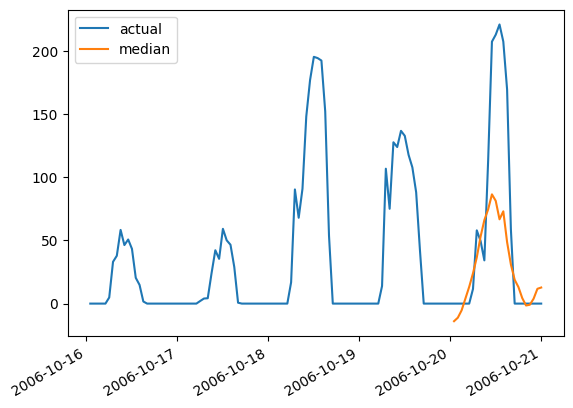

In [ ]:
plot(4)

## Setting Up the DLinear Model for Time Series Forecasting

After evaluating the Autoformer model, our project also explores the performance of the DLinear model, another approach for time series forecasting. The DLinear model is known for its simplicity and effectiveness in handling time series data.

- **Model Configuration with `DLinearEstimator`:**
  - We use the `DLinearEstimator` from `gluonts.torch.model.d_linear.estimator`.
  - The model is configured to align with the parameters used for the Autoformer model, ensuring a fair comparison between the two models.

- **Key Parameters:**
  - `prediction_length`: Set to the prediction horizon defined in the dataset's metadata. This determines how far into the future the model will forecast.
  - `context_length`: Twice the prediction length, defining the amount of historical data the model will consider for making each forecast.
  - `scaling`: The method used for scaling the data. We use the same scaling as the Autoformer model for consistency.
  - `hidden_dimension`: A parameter specific to the DLinear model, representing the size of the hidden layer in the network. We set it to 2 as a starting point.
  - `batch_size`: The number of time series samples in each training batch.
  - `num_batches_per_epoch`: The number of batches processed in each training epoch.
  - `trainer_kwargs`: Additional arguments for the model trainer, including the maximum number of epochs (`max_epochs`), set to the same value as used for the Autoformer model.

- **Purpose and Expectation:**
  - The DLinear model, with its simplicity, serves as a baseline against which we can compare the more complex Autoformer model.
  - By aligning key parameters like prediction length, context length, and training epochs, we aim to conduct a fair and meaningful comparison between the two models in terms of their forecasting accuracy and efficiency.

Configuring the DLinear model with these parameters is a crucial step in our comparative analysis of time series forecasting models. It allows us to assess the trade-offs between model complexity and forecasting performance within the context of our solar energy dataset.


In [ ]:
from gluonts.torch.model.d_linear.estimator import DLinearEstimator

# Define the DLinear model with the same parameters as the Autoformer model
dlinear_estimator = DLinearEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length*2,
    scaling=scaling,
    hidden_dimension=2,

    batch_size=batch_size,
    num_batches_per_epoch=num_batches_per_epoch,
    trainer_kwargs=dict(max_epochs=epochs)
)

## Training the DLinear Model

We train the DLinear model using the configured `estimator` on our solar energy training dataset:

- **Training Parameters:**
  - `training_data`: The solar energy training dataset.
  - `cache_data`: Set to `True` for efficiency, caching the transformed data.
  - `shuffle_buffer_length`: Set to 1024 to enhance data shuffling and model generalization.

- **Process:**
  - The `train` method of the `DLinearEstimator` is called with these parameters.
  - This step fine-tunes the model parameters based on the solar energy dataset.

- **Output:**
  - The training process yields a `predictor` object, representing the trained DLinear model ready for forecasting and evaluation.

Post training, we'll assess the DLinear model's forecasting ability and compare it with the Autoformer model.


In [ ]:
predictor_dlinear = dlinear_estimator.train(
    training_data=train_dataset,
    cache_data=True,
    shuffle_buffer_length=1024
)

## Evaluating the DLinear Model

Post-training, we evaluate the DLinear model's forecasting accuracy on the test dataset.

- **Generating Forecasts:**
  - `make_evaluation_predictions`: This function is used to generate forecasts for the entire test dataset.
  - `forecast_it` and `ts_it` are iterators over the forecasts and corresponding true time series values.

- **Converting Iterators to Lists:**
  - Both the forecasts and true time series are converted to lists (`d_linear_forecasts` and `d_linear_tss`) for ease of handling in the evaluation process.

- **Evaluation Process:**
  - An `Evaluator` object from GluonTS is instantiated.
  - It is then used to calculate aggregate metrics that assess the model's performance by comparing the forecasts with the actual data.

- **Metrics Computation:**
  - `evaluator`: Applies various metrics to quantify the forecasting performance.
  - `agg_metrics`: Aggregated metrics such as MAE, RMSE, etc., providing an overview of the model's accuracy.

This evaluation step is crucial for understanding how well the DLinear model performs in forecasting solar energy output and comparing its effectiveness against the Autoformer model.


In [ ]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator

forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor_dlinear,
)

d_linear_forecasts = list(forecast_it)
d_linear_tss = list(ts_it)

dlinear_evaluator = Evaluator()

agg_metrics, _ = dlinear_evaluator(iter(d_linear_tss), iter(d_linear_forecasts))


Running evaluation: 959it [00:00, 2947.17it/s]


## Reporting DLinear Model's MASE

After evaluating the DLinear model, we focus on a key metric to assess its forecasting accuracy:

- **MASE Extraction and Reporting:**
  - `dlinear_mase = agg_metrics["MASE"]`: Extracts the Mean Absolute Scaled Error (MASE) from the aggregated metrics.
  - `print(f"DLinear MASE: {dlinear_mase:.3f}")`: Prints the MASE value with three decimal points.
  - A MASE value less than one indicates that the model's forecasts are, on average, more accurate than a naïve forecast.

- **Significance:**
  - MASE is a scale-independent metric, making it ideal for comparing the performance of different forecasting models.
  - This metric provides a clear indication of the DLinear model's accuracy in forecasting solar energy output, crucial for comparing it against the Autoformer model.


In [ ]:
dlinear_mase = agg_metrics["MASE"]
print(f"DLinear MASE: {dlinear_mase:.3f}")

DLinear MASE: 2.350


## Visualizing DLinear Model Forecasts with `plot_gluonts`

The `plot_gluonts` function is created to visually compare actual data with DLinear model forecasts for individual time series in the test dataset.

- **Function Definition:**
  - `plot_gluonts(index)`: Takes an index as an argument to select a specific time series from the test dataset.

- **Plotting Process:**
  1. **Plotting Actual Data:**
     - Uses `plt.plot` to graph the actual values (`d_linear_tss[index]`) of the selected time series. It plots the last 4 prediction lengths to provide a broader context.
     - `to_timestamp()` converts the index to timestamp for clearer x-axis labeling.
  2. **Plotting Forecasts:**
     - `d_linear_forecasts[index].plot()`: Plots the forecasts generated by the DLinear model, colored in green for distinction.
  3. **Formatting:**
     - Includes a legend for clarity.
     - Applies `plt.gcf().autofmt_xdate()` to format the x-axis dates, enhancing readability.

- **Usage:**
  - By calling `plot_gluonts` with a specific index, we can visualize how well the DLinear model's forecasts align with the actual time series values.

- **Purpose:**
  - This visual comparison is valuable for a qualitative assessment of the model's predictive accuracy on individual time series, highlighting areas where the model performs well or where improvements may be needed.

This function is an essential tool for analyzing the DLinear model's performance, providing an intuitive and immediate understanding of its forecasting capabilities on the solar energy dataset.


In [ ]:
def plot_gluonts(index):
    plt.plot(d_linear_tss[index][-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target")
    d_linear_forecasts[index].plot(show_label=True,  color='g')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.show()

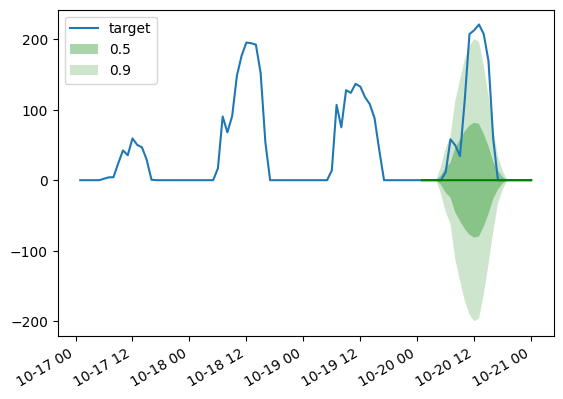

In [ ]:
plot_gluonts(4)

In [ ]:
from gluonts.torch.model.wavenet import WaveNetEstimator

# Define the WaveNet model for the solar-energy dataset
wavenet_estimator = WaveNetEstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    trainer_kwargs=dict(max_epochs=30),  # Number of training epochs
    num_residual_channels=24,  # Number of residual channels
    num_skip_channels=32,  # Number of skip channels
    dilation_depth=None,  # Automatically determined
    num_stacks=1,  # Number of dilation stacks
    lr=1e-3,  # Learning rate
    weight_decay=1e-8,  # Weight decay
    batch_size=32,  # Batch size
    num_batches_per_epoch=50  # Number of batches per epoch
)

In [ ]:
wavenet_predictor = wavenet_estimator.train(
    training_data=train_dataset,
    cache_data=True,
    shuffle_buffer_length=1024
)

In [ ]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator

# Assuming `wavenet_predictor` is your trained WaveNet model's predictor
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # Use the test dataset
    predictor=wavenet_predictor,  # Use the WaveNet predictor
)

wavenet_forecasts = list(forecast_it)
wavenet_tss = list(ts_it)

wavenet_evaluator = Evaluator()

# Evaluate the forecasts
agg_metrics, _ = wavenet_evaluator(iter(wavenet_tss), iter(wavenet_forecasts))

# agg_metrics will contain the evaluation metrics



Running evaluation: 959it [00:00, 5524.36it/s]


In [ ]:
Wavenet_mase = agg_metrics["MASE"]
print(f"Wavenet MASE: {Wavenet_mase:.3f}")

Wavenet MASE: 1.163


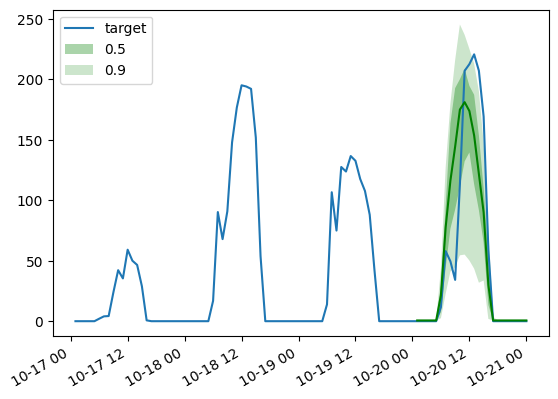

In [ ]:
def plot_gluonts(index):
    plt.plot(wavenet_tss[index][-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target")
    wavenet_forecasts[index].plot(show_label=True,  color='g')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.show()

plot_gluonts(4)

In [ ]:
from gluonts.torch.model.simple_feedforward import SimpleFeedForwardEstimator

# Define the SimpleFeedForward model for the solar-energy dataset
SFF_estimator = SimpleFeedForwardEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=10 * dataset.metadata.prediction_length,
    hidden_dimensions=[50, 50],  # Example: two hidden layers with 50 nodes each
    lr=1e-3,
    weight_decay=1e-8,
    batch_norm=True,  # Optional: Enable batch normalization
    batch_size=32,
    num_batches_per_epoch=50,
    trainer_kwargs=dict(max_epochs=30)  # Training for 30 epochs
)


In [ ]:
SFF_predictor = SFF_estimator.train(
    training_data=train_dataset,
    cache_data=True,
    shuffle_buffer_length=1024
)

In [ ]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator

# Assuming `SimpleFeedForward_predictor` is your trained SimpleFeedForward model's predictor
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # Use the test dataset
    predictor=SFF_predictor,  # Use the SimpleFeedForward predictor
)

SimpleFeedForward_forecasts = list(forecast_it)
SimpleFeedForward_tss = list(ts_it)

SFF_evaluator = Evaluator()

# Evaluate the forecasts
agg_metrics, _ = SFF_evaluator(iter(SimpleFeedForward_tss), iter(SimpleFeedForward_forecasts))

# agg_metrics will contain the evaluation metrics


Running evaluation: 959it [00:00, 3305.76it/s]


In [ ]:
SimpleFeedForward_mase = agg_metrics["MASE"]
print(f"SimpleFeedForward MASE: {SimpleFeedForward_mase:.3f}")

SimpleFeedForward MASE: 2.351


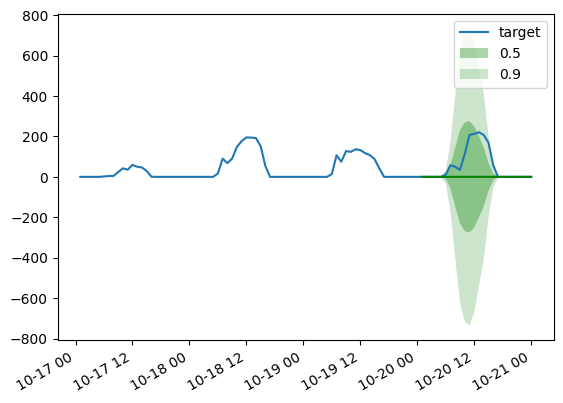

In [ ]:
def plot_gluonts(index):
    plt.plot(SimpleFeedForward_tss[index][-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target")
    SimpleFeedForward_forecasts[index].plot(show_label=True,  color='g')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.show()

plot_gluonts(4)

In [ ]:
from gluonts.torch.model.deepar import DeepAREstimator

DAR_estimator = DeepAREstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    context_length=2 * dataset.metadata.prediction_length,  # Adjust as needed
    num_layers=2,
    hidden_size=40,
    lr=1e-3,
    weight_decay=1e-8,
    dropout_rate=0.1,
    batch_size=32,
    num_batches_per_epoch=50,
    trainer_kwargs=dict(max_epochs=30)  # Training for 30 epochs
)

In [ ]:
DAR_predictor = DAR_estimator.train(
    training_data=train_dataset,
    cache_data=True,
    shuffle_buffer_length=1024
)

In [ ]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator

# Assuming ` DeepAR_predictor` is your trained  DeepAR model's predictor
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # Use the test dataset
    predictor=DAR_predictor,  # Use the  DeepAR predictor
)

DeepAR_forecasts = list(forecast_it)
DeepAR_tss = list(ts_it)

DAR_evaluator = Evaluator()

# Evaluate the forecasts
agg_metrics, _ = DAR_evaluator(iter( DeepAR_tss), iter( DeepAR_forecasts))



Running evaluation: 959it [00:00, 3027.77it/s]


In [ ]:
DeepAR_mase = agg_metrics["MASE"]
print(f"DeepAR MASE: {DeepAR_mase:.3f}")

DeepAR MASE: 1.262


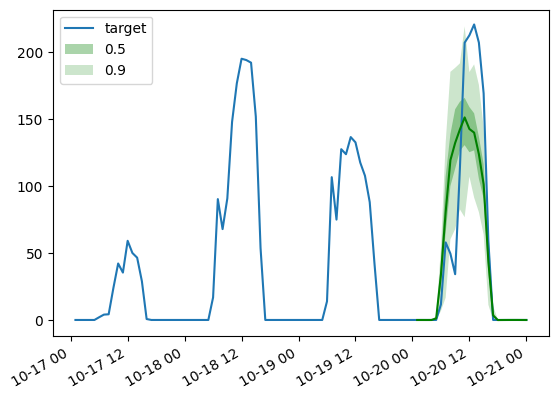

In [ ]:
def plot_gluonts(index):
    plt.plot(DeepAR_tss[index][-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target")
    DeepAR_forecasts[index].plot(show_label=True,  color='g')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.show()

plot_gluonts(4)

"""

Conclusion:
------------

Project Conclusion: Evaluating NLP Techniques and Deep Learning Frameworks for Time Series Forecasting

Overview:
---------
The project was centered on assessing the efficacy of NLP techniques and deep learning frameworks in the realm of time series forecasting. We employed a variety of models, each embodying different principles of deep learning and NLP, including DeepAR, SimpleFeedForward, WaveNet, DLinear, and Autoformer.

Model Performance Analysis:
---------------------------
- DeepAR (MASE: 1.262): Exhibits satisfactory forecasting accuracy, underscoring the adaptability of recurrent neural network architectures, commonly used in NLP, for time series data.
- SimpleFeedForward (MASE: 2.351): The model's lower performance indicates that simpler neural network architectures may be less suited for complex time series forecasting tasks.
- WaveNet (MASE: 1.163): Achieving the highest accuracy, this model highlights the effectiveness of convolutional neural network techniques, widely utilized in both deep learning and NLP, for time series forecasting.
- DLinear (MASE: 2.350): Similar to the SimpleFeedForward, DLinear's performance suggests that more sophisticated models, like RNNs or CNNs, might be necessary to capture time series data complexities.
- Autoformer (MASE: 1.650): As a variant of the transformer model, which has significantly impacted NLP, Autoformer's promising results indicate the potential applicability of transformer-based models in time series forecasting.

Insights and Final Thoughts:
-----------------------------
The comparative analysis of these models demonstrates that deep learning frameworks, particularly those leveraging recurrent and convolutional structures, are indeed effective for time series forecasting. The success of models developed for sequential data processing in NLP tasks can be translated into time series forecasting, as evidenced by the performance of WaveNet and the encouraging outcomes from Autoformer.

In conclusion, this project validates the hypothesis that NLP techniques and deep learning frameworks can be effectively harnessed for time series forecasting. It opens pathways for further exploration and refinement, especially in advanced models like transformers, to fully exploit their capabilities in forecasting scenarios.
"""
